# Model Estimation and Validation

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import pickle

# Loading the Data and Selecting the Features

### Import Data

In [2]:
# loan_data_backup = pd.read_pickle("loan_data_2007_2014_preprocessed")
loan_data_inputs_train = pd.read_pickle("../data/loan_data_inputs_train.pkl")
loan_data_targets_train = pd.read_pickle("../data/loan_data_targets_train.pkl")
loan_data_inputs_test = pd.read_pickle("../data/loan_data_inputs_test.pkl")
loan_data_targets_test = pd.read_pickle("../data/loan_data_targets_test.pkl")

### Explore Data

First check is that the length of the loan_data_inputs and the loan_data_targets are the same.

In [3]:
len(loan_data_inputs_train) == len(loan_data_targets_train)

True

In [4]:
print(loan_data_inputs_train.shape)
print(loan_data_targets_train.shape)

(373028, 369)
(373028,)


In [5]:
loan_data_inputs_train.columns[250:]

Index(['inq_last_6mths:0', 'inq_last_6mths:1-2', 'inq_last_6mths:3',
       'inq_last_6mths:>4', 'open_acc_factor', 'open_acc:0', 'open_acc:1-3',
       'open_acc:4-12', 'open_acc:13-17', 'open_acc:18-22',
       ...
       'vix_min:13.31-14.07', 'vix_min:14.07-14.81', 'vix_min:14.81-16.30',
       'vix_min:>16.30', 'retail_sales_factor', 'retail_sales:<0.955',
       'retail_sales:0.955-0.99', 'retail_sales:0.99-1.007',
       'retail_sales:1.007-1.024', 'retail_sales:>1.024'],
      dtype='object', length=119)

In [6]:
pd.options.display.max_columns = None

In [7]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,vix_mean,vix_min,vix_max,vix_spread,year,ted_spread_mean,ted_spread_min,ted_spread_max,ted_spread_spread,nat_unemp,retail_sales,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,payment_to_inc,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND,addr_state:ND_NE_IA_NV_AL_FL_HI,addr_state:MD_OK_MO_NC_LA_NM,addr_state:VA_TN_AZ_RI_NJ_UT,addr_state:PA_AR_MI_IN_KY,addr_state:MN_MA_DE_OH_SD,addr_state:CR_WA_GA_VM,addr_state:SC_IL_CT,addr_state:CO_AK_MT_KS_VT,addr_state:ID_NH_MS_WY_DC_WV_ME,purpose:educ__sm_b__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d_factor,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate_factor,int_rate:<=9.5,int_rate:9.5-12.0,int_rate:12.0-15.75,int_rate:15.75-20.25,int_rate:>20.25,funded_amnt_factor,funded_amnt:<5675,funded_amnt:5675-7400,funded_amnt:7400-10850,funded_amnt:10850-16025,funded_amnt:>16025,mths_since_earliest_cr_line_factor,mths_since_earliest_cr_line:<145,mths_s

### Selecting the Features
We would like to select only the independent variables we need.  The original dataset contained a huge number of variables, and for PD models we prefer a small set of variables. Below is the list of features to be included in the baseline model.

In [8]:
inputs_train_with_ref_cat = loan_data_inputs_train[['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_AL_FL_HI',
'addr_state:MD_OK_MO_NC_LA_NM',                                                    
'addr_state:NY',
'addr_state:VA_TN_AZ_RI_NJ_UT',
'addr_state:CA',
'addr_state:PA_AR_MI_IN_KY',
'addr_state:MN_MA_DE_OH_SD',
'addr_state:CR_WA_GA_VM',
'addr_state:SC_IL_CT',
'addr_state:TX',
'addr_state:CO_AK_MT_KS_VT',      
'addr_state:ID_NH_MS_WY_DC_WV_ME',                  
'purpose:debt_consolidation',                                                    
'purpose:credit_card',                                                    
'purpose:educ__sm_b__ren_en__mov__house',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:w',
'initial_list_status:f',                                                    
'verification_status:Verified',                                 
'verification_status:Source Verified',                                                   
'verification_status:Not Verified',                 
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<=9.5',
'int_rate:9.5-12.0',
'int_rate:12.0-15.75',
'int_rate:15.75-20.25',
'int_rate:>20.25',
'funded_amnt:<5675',
'funded_amnt:5675-7400',
'funded_amnt:7400-10850',
'funded_amnt:10850-16025',
'funded_amnt:>16025',
'mths_since_earliest_cr_line:<145',
'mths_since_earliest_cr_line:145-182',
'mths_since_earliest_cr_line:182-255',
'mths_since_earliest_cr_line:255-292',
'mths_since_earliest_cr_line:292-382',
'mths_since_earliest_cr_line:>382',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3',
'inq_last_6mths:>4',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0',
'pub_rec:1',
'pub_rec:2',
'pub_rec:>2',
'total_acc:<=5',
'total_acc:5-10',
'total_acc:10-15',
'total_acc:16-20',
'total_acc:20-31',
'total_acc:32-47',
'total_acc:>47',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=2.5K',
'total_rev_hi_lim:2.5K-5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'payment_to_inc_factor:<1',
'payment_to_inc_factor:1-2',
'payment_to_inc_factor:2-4',
'payment_to_inc_factor:4-6',
'payment_to_inc_factor:6-8',
'payment_to_inc_factor:8-11',
'payment_to_inc_factor:11-15',
'payment_to_inc_factor:>15',
'installment:<130',
'installment:130-214',
'installment:214-296',
'installment:296-380',
'installment:380-435',
'installment:435-603',
'installment:603-1020',
'installment:>1020',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'dti:<=1.4',
'dti:1.4-3.5', 
'dti:3.5-7.7', 
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-21.0',
'dti:21.0-23.8',
'dti:23.8-35.0',
'dti:>35',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
'ted_spread_max:<0.239',
'ted_spread_max:0.239-0.327',
'ted_spread_max:0.327-0.416',
'ted_spread_max:>0.416',
'vix_min:<11.07',
'vix_min:11.07-11.82',
'vix_min:11.82-12.56',
'vix_min:12.56-13.31',
'vix_min:13.31-14.07',
'vix_min:14.07-14.81',
'vix_min:14.81-16.30',
'vix_min:>16.30',                                                    
'nat_unemp:<5.68',
'nat_unemp:5.68-6.22',
'nat_unemp:6.22-7.3',
'nat_unemp:7.3-8.38',
'nat_unemp:>8.38',                                   
'retail_sales:<0.955',
'retail_sales:0.955-0.99',
'retail_sales:0.99-1.007',
'retail_sales:1.007-1.024',
'retail_sales:>1.024']]

We need to drop the reference class dummies for each feature, to prevent multi-collinearity. For prudent risk management the reference classes have the lowest WoE.

In [9]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_AL_FL_HI',
'verification_status:Verified',              
'purpose:educ__sm_b__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.25',
'funded_amnt:>16025',
'mths_since_earliest_cr_line:>382',
'delinq_2yrs:0',
'inq_last_6mths:>4',
'open_acc:0',
'pub_rec:0',
'total_acc:>47',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=2.5K',
'annual_inc:<20K',
'payment_to_inc_factor:>15',
'mths_since_last_delinq:0-3',
'dti:>35',
'mths_since_last_record:0-2',
'ted_spread_max:>0.416',
'vix_min:>16.30',
'nat_unemp:>8.38',
'retail_sales:0.955-0.99']

In [10]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)

In [11]:
inputs_train.dtypes

grade:A                     int32
grade:B                     int32
grade:C                     int32
grade:D                     int32
grade:E                     int32
                            ...  
nat_unemp:7.3-8.38          int32
retail_sales:<0.955         int32
retail_sales:0.99-1.007     int32
retail_sales:1.007-1.024    int32
retail_sales:>1.024         int32
Length: 144, dtype: object

# PD Model Estimation

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [13]:
reg = LogisticRegression()

In [14]:
pd.options.display.max_rows = None

Estimate coefficents using independent variables X and target variables y 

In [15]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\User1\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Let's show the intercept and coefficients

In [16]:
reg.intercept_

array([-1.55975856])

In [17]:
reg.coef_

array([[ 1.05363440e+00,  8.84421734e-01,  6.68427094e-01,
         4.95714639e-01,  3.34412989e-01,  1.67634423e-01,
         9.28537363e-02,  1.11537550e-01,  7.65050312e-02,
         7.08422700e-02,  7.46624271e-02,  7.76768117e-02,
         1.45088207e-01,  1.60513579e-01,  2.13426414e-01,
         2.96947496e-01,  2.61540587e-01,  3.63471380e-01,
         4.87364522e-01,  3.76137320e-01,  4.91636819e-01,
         3.31007975e-01,  3.97191888e-01,  3.30003473e-02,
        -4.37686147e-02,  1.84848975e-02,  8.91687385e-02,
         1.26212392e-01,  1.30584363e-01,  1.01234714e-01,
         7.60716297e-02,  1.36263826e-01,  8.98980707e-01,
         6.40448645e-01,  5.12976660e-01,  3.68210965e-01,
         2.50100901e-01,  1.08373643e-01,  6.31965219e-04,
         8.92118081e-01,  4.85767292e-01,  2.61649901e-01,
         7.30195764e-02,  1.13212887e-01,  4.30935311e-02,
         8.06605735e-02,  6.00351073e-02, -1.78433168e-01,
        -9.77543671e-02, -8.36917295e-02, -7.42604000e-0

In [18]:
feature_name = inputs_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [19]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]] # intercept is not in column names
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.559759
1,grade:A,1.053634
2,grade:B,0.884422
3,grade:C,0.668427
4,grade:D,0.495715
5,grade:E,0.334413
6,grade:F,0.167634
7,home_ownership:OWN,0.092854
8,home_ownership:MORTGAGE,0.111538
9,addr_state:MD_OK_MO_NC_LA_NM,0.076505


## Build a Logistic Regression Model with P-Values

In [20]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates 
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] 
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [21]:
reg = LogisticRegression_with_p_values()

### Let's estimate the coefficents and put them in a summary table

In [22]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\User1\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table_baseline = summary_table.sort_index()
summary_table_baseline

,Feature name,Coefficients
0,Intercept,-1.559759
1,grade:A,1.053634
2,grade:B,0.884422
3,grade:C,0.668427
4,grade:D,0.495715
5,grade:E,0.334413
6,grade:F,0.167634
7,home_ownership:OWN,0.092854
8,home_ownership:MORTGAGE,0.111538
9,addr_state:MD_OK_MO_NC_LA_NM,0.076505


Add p-values to the summary table

In [24]:
p_values = reg.p_values

In [25]:
p_values = np.append(np.nan, np.array(p_values)) # We add the value 'NaN' in the beginning of the variable with p-values.

In [26]:
summary_table_baseline['p_values'] = p_values

### Summary Table for the Baseline Model - All In

In [27]:
summary_table_baseline

,Feature name,Coefficients,p_values
0,Intercept,-1.559759,NaN
1,grade:A,1.053634,2.640557e-29
2,grade:B,0.884422,5.131007e-46
3,grade:C,0.668427,2.090200e-31
4,grade:D,0.495715,6.911700e-20
5,grade:E,0.334413,5.358654e-12
6,grade:F,0.167634,9.119760e-04
7,home_ownership:OWN,0.092854,3.980984e-06
8,home_ownership:MORTGAGE,0.111538,2.108337e-18
9,addr_state:MD_OK_MO_NC_LA_NM,0.076505,1.164634e-03


### First Run Baseline Model

In [28]:
pickle.dump(reg, open('pd_model1.sav', 'wb'))

In [29]:
baseline_hat_train = reg.model.predict(inputs_train)
baseline_hat_train

array([1, 1, 1, ..., 1, 1, 1])

Calculate the predicted probability of default using the selected features 

In [30]:
baseline_hat_train_proba = reg.model.predict_proba(inputs_train)

In [31]:
# The probabilities of being 0 and probability of being 1 are:
baseline_hat_train_proba

array([[0.10423148, 0.89576852],
       [0.08975332, 0.91024668],
       [0.07876629, 0.92123371],
       ...,
       [0.07036009, 0.92963991],
       [0.0947898 , 0.9052102 ],
       [0.12836271, 0.87163729]])

In [32]:
baseline_hat_train_proba[:][:,1]

array([0.89576852, 0.91024668, 0.92123371, ..., 0.92963991, 0.9052102 ,
       0.87163729])

The probability of = 1 is

In [33]:
baseline_hat_train_proba = baseline_hat_train_proba[: ][: , 1]
baseline_hat_train_proba

array([0.89576852, 0.91024668, 0.92123371, ..., 0.92963991, 0.9052102 ,
       0.87163729])

In [34]:
baseline_hat_train_proba

array([0.89576852, 0.91024668, 0.92123371, ..., 0.92963991, 0.9052102 ,
       0.87163729])

In [35]:
loan_data_targets_train_temp = loan_data_targets_train

In [36]:
loan_data_targets_train_temp.reset_index(drop = True, inplace = True)

Concatenate the two matrices

In [37]:
df_actual_predicted_probs = pd.concat([loan_data_targets_train_temp, pd.DataFrame(baseline_hat_train_proba)], axis = 1)

In [38]:
df_actual_predicted_probs.shape

(373028, 2)

In [39]:
df_actual_predicted_probs.columns = ['loan_data_targets_train', 'baseline_hat_train_proba']

In [40]:
df_actual_predicted_probs.index = loan_data_inputs_train.index

In [41]:
df_actual_predicted_probs.head()

,loan_data_targets_train,baseline_hat_train_proba
427211,1,0.895769
206088,1,0.910247
136020,1,0.921234
412305,1,0.958280
36159,1,0.812023


In [42]:
### Accuracy and Area under the Curve
tr = 0.9
df_actual_predicted_probs['baseline_hat_train'] = np.where(df_actual_predicted_probs['baseline_hat_train_proba'] > tr, 1, 0)

Create a Confusion Matrix

In [43]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_train'], df_actual_predicted_probs['baseline_hat_train'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,29460,11419
1,141765,190384


Converting to percentages

In [44]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_train'], df_actual_predicted_probs['baseline_hat_train'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.078975,0.030612
1,0.380038,0.510375


The sum of the diagonal of the confusion matrix is the Accuracy

In [45]:
accuracy_baseline = (pd.crosstab(df_actual_predicted_probs['loan_data_targets_train'], df_actual_predicted_probs['baseline_hat_train'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_train'], df_actual_predicted_probs['baseline_hat_train'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
print("Accuracy for the baseline PD model is: " + str(accuracy_baseline))

Accuracy for the baseline PD model is: 0.5893498611364294


In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

In [47]:
roc_curve(df_actual_predicted_probs['loan_data_targets_train'], df_actual_predicted_probs['baseline_hat_train_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99992661, 1.        ,
        1.        ]),
 array([0.00000000e+00, 3.01069701e-06, 1.53545547e-04, ...,
        9.99984947e-01, 9.99984947e-01, 1.00000000e+00]),
 array([1.99379944, 0.99379944, 0.99206565, ..., 0.42598026, 0.41608984,
        0.3755105 ]))

In [48]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_train'], df_actual_predicted_probs['baseline_hat_train_proba'])

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5,1,'ROC curve')

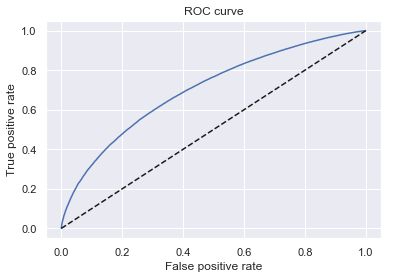

In [50]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [180]:
AUROC_baseline = roc_auc_score(df_actual_predicted_probs['loan_data_targets_train'], df_actual_predicted_probs['baseline_hat_train_proba'])
AUROC_baseline

0.7029455628940945

### Gini and Kolmogorov-Smirnov

In [52]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('baseline_hat_train_proba')
df_actual_predicted_probs.head()
df_actual_predicted_probs.tail()
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [53]:
df_actual_predicted_probs.head()

,index,loan_data_targets_train,baseline_hat_train_proba,baseline_hat_train
0,41601,1,0.375510,0
1,41928,1,0.396790,0
2,42017,1,0.401300,0
3,213839,1,0.411692,0
4,42352,1,0.414012,0


In [54]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_train'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_train'].cumsum()

In [55]:
df_actual_predicted_probs.head()

,index,loan_data_targets_train,baseline_hat_train_proba,baseline_hat_train,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,41601,1,0.375510,0,1,1,0
1,41928,1,0.396790,0,2,2,0
2,42017,1,0.401300,0,3,3,0
3,213839,1,0.411692,0,4,4,0
4,42352,1,0.414012,0,5,5,0


In [56]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_train'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_train'].sum())

In [57]:
df_actual_predicted_probs.head()

,index,loan_data_targets_train,baseline_hat_train_proba,baseline_hat_train,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,41601,1,0.375510,0,1,1,0,0.000003,0.000003,0.0
1,41928,1,0.396790,0,2,2,0,0.000005,0.000006,0.0
2,42017,1,0.401300,0,3,3,0,0.000008,0.000009,0.0
3,213839,1,0.411692,0,4,4,0,0.000011,0.000012,0.0
4,42352,1,0.414012,0,5,5,0,0.000013,0.000015,0.0


In [58]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_train,baseline_hat_train_proba,baseline_hat_train,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
373023,247314,1,0.993542,1,373024,332145,40879,0.999989,0.999988,1.0
373024,262093,1,0.993616,1,373025,332146,40879,0.999992,0.999991,1.0
373025,339472,1,0.993643,1,373026,332147,40879,0.999995,0.999994,1.0
373026,243132,1,0.993669,1,373027,332148,40879,0.999997,0.999997,1.0
373027,255498,1,0.993799,1,373028,332149,40879,1.000000,1.000000,1.0


### Evaluation of Credit Models

#### Gini

For new credit models the first question asked is "What is the Gini?"

The Gini is a metric that measure the effectiveness of the model disriminating between "good" obligors who will pay back their loans in the future and "bad" obligors who will not.  The metric is often used to compare the quality of different models and their prediction power.


#### The Kolmogorov-Smirnov Test

It is the maximum distance between the red and blue lines in the plot below....

https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test

### Plot the Gini co-efficient 

Text(0.5,1,'Gini')

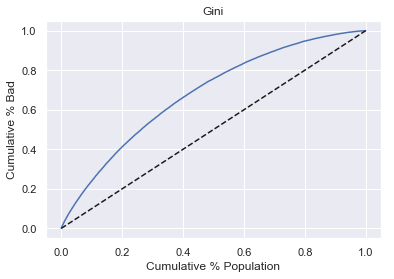

In [59]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [60]:
Gini_baseline = AUROC * 2 - 1
Gini_baseline

0.405891125788189

### Plot the KS Kolmogorov-Smirnov results

Text(0.5,1,'Kolmogorov-Smirnov')

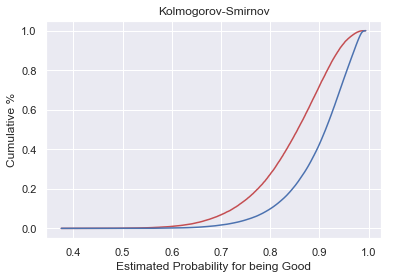

In [61]:
plt.plot(df_actual_predicted_probs['baseline_hat_train_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['baseline_hat_train_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

We calculate KS from the data. It is the maximum of the difeerence between the cummulative percentage of 'bad' and the cummulative percentage of good predictions 

In [62]:
KS_baseline = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS_baseline

0.29510567735439175

In [63]:
summary_table_baseline

,Feature name,Coefficients,p_values
0,Intercept,-1.559759,NaN
1,grade:A,1.053634,2.640557e-29
2,grade:B,0.884422,5.131007e-46
3,grade:C,0.668427,2.090200e-31
4,grade:D,0.495715,6.911700e-20
5,grade:E,0.334413,5.358654e-12
6,grade:F,0.167634,9.119760e-04
7,home_ownership:OWN,0.092854,3.980984e-06
8,home_ownership:MORTGAGE,0.111538,2.108337e-18
9,addr_state:MD_OK_MO_NC_LA_NM,0.076505,1.164634e-03


### Selecting Features to Keep:
    
If the coefficient for a dummy variable of a feature is statistically significant then all of the dummies for that feature will be retained.

If none of coefficients for dummy variables associated with a feature are statistically significant all of the dummies for that feature are dropped.

* delinq_2yrs
* open_acc
* pub_rec
* total_rev_hi_lim (only one significant variable)
* acc_now_delinq:
* installment
* mnths_since_last_deliq
* ted_spread
* vix
* nat_enemp

The variables below are the ones to keep are:

* grade
* home_ownership
* addr_state
* verification_status
* purpose
* initial_list_status
* term
* emp_length
* mths_since_issued
* int_rate
* mnth_since_earliest_cr_line
* inq_last_6m
* annual_inc
* payment_to_inc_factor
* dti
* mths_since_last_delinq
* mths_since_last_record

### Running a Refined Model #1

In [64]:
inputs_train_with_ref_cat_1 = loan_data_inputs_train[['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_AL_FL_HI', 
'addr_state:MD_OK_MO_NC_LA_NM',                                                      
'addr_state:NY',
'addr_state:VA_TN_AZ_RI_NJ_UT',
'addr_state:CA',
'addr_state:PA_AR_MI_IN_KY',
'addr_state:MN_MA_DE_OH_SD',
'addr_state:CR_WA_GA_VM',
'addr_state:SC_IL_CT',
'addr_state:TX',
'addr_state:CO_AK_MT_KS_VT',          
'addr_state:ID_NH_MS_WY_DC_WV_ME',                                                                                       
'purpose:debt_consolidation',                                                    
'purpose:credit_card',                                                    
'purpose:educ__sm_b__ren_en__mov__house',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:w',
'initial_list_status:f',                                                    
'verification_status:Verified',                                 
'verification_status:Source Verified',                                                   
'verification_status:Not Verified',                 
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<=9.5',
'int_rate:9.5-12.0',
'int_rate:12.0-15.75',
'int_rate:15.75-20.25',
'int_rate:>20.25',
'funded_amnt:<5675',
'funded_amnt:5675-7400',
'funded_amnt:7400-10850',
'funded_amnt:10850-16025',
'funded_amnt:>16025',
'mths_since_earliest_cr_line:<145',
'mths_since_earliest_cr_line:145-182',
'mths_since_earliest_cr_line:182-255',
'mths_since_earliest_cr_line:255-292',
'mths_since_earliest_cr_line:292-382',
'mths_since_earliest_cr_line:>382',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3',
'inq_last_6mths:>4',
'payment_to_inc_factor:<1',
'payment_to_inc_factor:1-2',
'payment_to_inc_factor:2-4',
'payment_to_inc_factor:4-6',
'payment_to_inc_factor:6-8',
'payment_to_inc_factor:8-11',
'payment_to_inc_factor:11-15',
'payment_to_inc_factor:>15',                                                      
'total_acc:<=5',
'total_acc:5-10',
'total_acc:10-15',
'total_acc:16-20',
'total_acc:20-31',
'total_acc:32-47',
'total_acc:>47',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5', 
'dti:3.5-7.7', 
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-21.0',
'dti:21.0-23.8',
'dti:23.8-35.0',
'dti:>35',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
'retail_sales:<0.955',
'retail_sales:0.955-0.99',
'retail_sales:0.99-1.007',
'retail_sales:1.007-1.024',
'retail_sales:>1.024'
        ]] 

In [65]:
inputs_train_with_ref_cat_1.dtypes

grade:A                                   int32
grade:B                                   int32
grade:C                                   int32
grade:D                                   int32
grade:E                                   int32
grade:F                                   int32
grade:G                                   int32
home_ownership:RENT_OTHER_NONE_ANY        int32
home_ownership:OWN                        int32
home_ownership:MORTGAGE                   int32
addr_state:ND_NE_IA_NV_AL_FL_HI           int64
addr_state:MD_OK_MO_NC_LA_NM              int32
addr_state:NY                             int32
addr_state:VA_TN_AZ_RI_NJ_UT              int32
addr_state:CA                             int32
addr_state:PA_AR_MI_IN_KY                 int32
addr_state:MN_MA_DE_OH_SD                 int32
addr_state:CR_WA_GA_VM                    int32
addr_state:SC_IL_CT                       int32
addr_state:TX                             int32
addr_state:CO_AK_MT_KS_VT               

#### Dummies to Drop
The reference categories are the dummy values to be removed to prevent multi-collinearity.
Whilst any one of the dummies can be removed for each of the categorical variables, from a business viewpoint it is best to choose the "worst".
The riskiest dummy variable for each category will be removed, so that the worst case (most defaults) is our baseline.
Everything can be expressed as an improvement over baseline.

In [66]:
ref_categories_1 = ['grade:G',
                  'home_ownership:RENT_OTHER_NONE_ANY',
                  'addr_state:ND_NE_IA_NV_AL_FL_HI',
                  'purpose:educ__sm_b__ren_en__mov__house',
                  'verification_status:Verified',
                  'initial_list_status:w',
                  'term:60',
                  'emp_length:0',
                  'mths_since_issue_d:>84',
                  'int_rate:>20.25',
                  'funded_amnt:>16025',
                  'mths_since_earliest_cr_line:<145',
                  'inq_last_6mths:>4',
                  'total_acc:5-10',
                  'annual_inc:<20K',
                  'payment_to_inc_factor:>15',
                  'dti:>35',
                  'mths_since_last_record:0-2',
                  'retail_sales:0.955-0.99',
                 ]

In [67]:
list1,list2=[],[]
list1 = inputs_train_with_ref_cat_1
list2 = ref_categories_1
def difference(list1,list2):
    return (list(set(list1) & set(list2)))

diffs = difference(list1,list2)
sorted(diffs)

['addr_state:ND_NE_IA_NV_AL_FL_HI',
 'annual_inc:<20K',
 'dti:>35',
 'emp_length:0',
 'funded_amnt:>16025',
 'grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'initial_list_status:w',
 'inq_last_6mths:>4',
 'int_rate:>20.25',
 'mths_since_earliest_cr_line:<145',
 'mths_since_issue_d:>84',
 'mths_since_last_record:0-2',
 'payment_to_inc_factor:>15',
 'purpose:educ__sm_b__ren_en__mov__house',
 'retail_sales:0.955-0.99',
 'term:60',
 'total_acc:5-10',
 'verification_status:Verified']

In [68]:
inputs_train_1 = inputs_train_with_ref_cat_1.drop(ref_categories_1, axis = 1)
inputs_train_1.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:MD_OK_MO_NC_LA_NM,addr_state:NY,addr_state:VA_TN_AZ_RI_NJ_UT,addr_state:CA,addr_state:PA_AR_MI_IN_KY,addr_state:MN_MA_DE_OH_SD,addr_state:CR_WA_GA_VM,addr_state:SC_IL_CT,addr_state:TX,addr_state:CO_AK_MT_KS_VT,addr_state:ID_NH_MS_WY_DC_WV_ME,purpose:debt_consolidation,purpose:credit_card,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,verification_status:Source Verified,verification_status:Not Verified,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<=9.5,int_rate:9.5-12.0,int_rate:12.0-15.75,int_rate:15.75-20.25,funded_amnt:<5675,funded_amnt:5675-7400,funded_amnt:7400-10850,funded_amnt:10850-16025,mths_since_earliest_cr_line:145-182,mths_since_earliest_cr_line:182-255,mths_since_earliest_cr_line:255-292,mths_since_earliest_cr_line:292-382,mths_since_earliest_cr_line:>382,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3,payment_to_inc_factor:<1,payment_to_inc_factor:1-2,payment_to_inc_factor:2-4,payment_to_inc_factor:4-6,payment_to_inc_factor:6-8,payment_to_inc_factor:8-11,payment_to_inc_factor:11-15,total_acc:<=5,total_acc:10-15,total_acc:16-20,total_acc:20-31,total_acc:32-47,total_acc:>47,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-21.0,dti:21.0-23.8,dti:23.8-35.0,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,retail_sales:<0.955,retail_sales:0.99-1.007,retail_sales:1.007-1.024,retail_sales:>1.024
427211,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
206088,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
136020,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
412305,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
36159,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [69]:
# Here we run a new model.
reg1 = LogisticRegression_with_p_values()
reg1.fit(inputs_train_1, loan_data_targets_train)

C:\Users\User1\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
feature_name = inputs_train_1.columns.values

### Summary Table for Regression 1

In [71]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg1.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg1.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.489169,NaN
1,grade:A,1.037297,5.576174e-29
2,grade:B,0.881202,2.565777e-47
3,grade:C,0.665112,2.209950e-32
4,grade:D,0.494467,8.270945e-21
5,grade:E,0.339020,2.594554e-13
6,grade:F,0.172266,3.507995e-04
7,home_ownership:OWN,0.099114,8.099375e-07
8,home_ownership:MORTGAGE,0.114555,2.025964e-19
9,addr_state:MD_OK_MO_NC_LA_NM,0.072128,2.104043e-03


We save the model down using pickle as pd_model.sav.  We will retrieve this model in the final notebook 05 to calculate EL = PD * EAD * LGD.  The columns must remain consistent between pd_model.sav and notebook 5.  

In [72]:
pickle.dump(reg1, open('pd_model.sav', 'wb'))

### PD Model Validation (Test)

We use the same variables in the test as we used in the training phase of the model.

In [73]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
inputs_test_with_ref_cat_1 = loan_data_inputs_test[['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_AL_FL_HI', 
'addr_state:MD_OK_MO_NC_LA_NM', 
'addr_state:NY',
'addr_state:VA_TN_AZ_RI_NJ_UT',
'addr_state:CA',
'addr_state:PA_AR_MI_IN_KY',
'addr_state:MN_MA_DE_OH_SD',
'addr_state:CR_WA_GA_VM',
'addr_state:SC_IL_CT',
'addr_state:TX',
'addr_state:CO_AK_MT_KS_VT',          
'addr_state:ID_NH_MS_WY_DC_WV_ME',
'purpose:debt_consolidation',                                                    
'purpose:credit_card',                                                    
'purpose:educ__sm_b__ren_en__mov__house',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:w',
'initial_list_status:f',                                                    
'verification_status:Verified',                                 
'verification_status:Source Verified',                                                   
'verification_status:Not Verified',                 
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<=9.5',
'int_rate:9.5-12.0',
'int_rate:12.0-15.75',
'int_rate:15.75-20.25',
'int_rate:>20.25',
'funded_amnt:<5675',
'funded_amnt:5675-7400',
'funded_amnt:7400-10850',
'funded_amnt:10850-16025',
'funded_amnt:>16025',
'mths_since_earliest_cr_line:<145',
'mths_since_earliest_cr_line:145-182',
'mths_since_earliest_cr_line:182-255',
'mths_since_earliest_cr_line:255-292',
'mths_since_earliest_cr_line:292-382',
'mths_since_earliest_cr_line:>382',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3',
'inq_last_6mths:>4',
'total_acc:<=5',
'total_acc:5-10',
'total_acc:10-15',
'total_acc:16-20',
'total_acc:20-31',
'total_acc:32-47',
'total_acc:>47',
'payment_to_inc_factor:<1',
'payment_to_inc_factor:1-2',
'payment_to_inc_factor:2-4',
'payment_to_inc_factor:4-6',
'payment_to_inc_factor:6-8',
'payment_to_inc_factor:8-11',
'payment_to_inc_factor:11-15',
'payment_to_inc_factor:>15',                              
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5', 
'dti:3.5-7.7', 
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-21.0',
'dti:21.0-23.8',
'dti:23.8-35.0',
'dti:>35',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
'retail_sales:<0.955',
'retail_sales:0.955-0.99',
'retail_sales:0.99-1.007',
'retail_sales:1.007-1.024',
'retail_sales:>1.024'
        ]]

In [74]:
inputs_test_with_ref_cat_1 = inputs_test_with_ref_cat_1.astype('int8')

In [75]:
ref_categories_1 = ['grade:G',
                  'home_ownership:RENT_OTHER_NONE_ANY',
                  'addr_state:ND_NE_IA_NV_AL_FL_HI',
                  'purpose:educ__sm_b__ren_en__mov__house',
                  'verification_status:Verified',
                  'initial_list_status:w',
                  'term:60',
                  'emp_length:0',
                  'mths_since_issue_d:>84',
                  'int_rate:>20.25',
                  'funded_amnt:>16025',
                  'mths_since_earliest_cr_line:<145',
                  'inq_last_6mths:>4',
                  'total_acc:5-10',
                  'annual_inc:<20K',
                  'payment_to_inc_factor:>15',
                  'dti:>35',
                  'mths_since_last_record:0-2',
                  'retail_sales:0.955-0.99',
                 ]

In [76]:
inputs_test_1 = inputs_test_with_ref_cat_1.drop(ref_categories_1, axis = 1)
inputs_test_1.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:MD_OK_MO_NC_LA_NM,addr_state:NY,addr_state:VA_TN_AZ_RI_NJ_UT,addr_state:CA,addr_state:PA_AR_MI_IN_KY,addr_state:MN_MA_DE_OH_SD,addr_state:CR_WA_GA_VM,addr_state:SC_IL_CT,addr_state:TX,addr_state:CO_AK_MT_KS_VT,addr_state:ID_NH_MS_WY_DC_WV_ME,purpose:debt_consolidation,purpose:credit_card,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,verification_status:Source Verified,verification_status:Not Verified,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<=9.5,int_rate:9.5-12.0,int_rate:12.0-15.75,int_rate:15.75-20.25,funded_amnt:<5675,funded_amnt:5675-7400,funded_amnt:7400-10850,funded_amnt:10850-16025,mths_since_earliest_cr_line:145-182,mths_since_earliest_cr_line:182-255,mths_since_earliest_cr_line:255-292,mths_since_earliest_cr_line:292-382,mths_since_earliest_cr_line:>382,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3,total_acc:<=5,total_acc:10-15,total_acc:16-20,total_acc:20-31,total_acc:32-47,total_acc:>47,payment_to_inc_factor:<1,payment_to_inc_factor:1-2,payment_to_inc_factor:2-4,payment_to_inc_factor:4-6,payment_to_inc_factor:6-8,payment_to_inc_factor:8-11,payment_to_inc_factor:11-15,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-21.0,dti:21.0-23.8,dti:23.8-35.0,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,retail_sales:<0.955,retail_sales:0.99-1.007,retail_sales:1.007-1.024,retail_sales:>1.024
362514,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
288564,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
213591,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
263083,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
165001,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


Calculating the fitted values for y^

In [77]:
y_hat_test_1 = reg1.model.predict(inputs_test_1)
y_hat_test_1

array([1, 1, 1, ..., 1, 1, 1])

Calculate the predicted probability of default using the selected features 

In [78]:
y_hat_test_proba = reg1.model.predict_proba(inputs_test_1)

The probabilities of being 0 and probability of being 1 are:

In [79]:
y_hat_test_proba

array([[0.07325712, 0.92674288],
       [0.09535778, 0.90464222],
       [0.09067908, 0.90932092],
       ...,
       [0.11784698, 0.88215302],
       [0.07124042, 0.92875958],
       [0.04353128, 0.95646872]])

In [80]:
y_hat_test_proba[:][:,1]

array([0.92674288, 0.90464222, 0.90932092, ..., 0.88215302, 0.92875958,
       0.95646872])

In [81]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

The probability of = 1 is

In [82]:
y_hat_test_proba

array([0.92674288, 0.90464222, 0.90932092, ..., 0.88215302, 0.92875958,
       0.95646872])

In [83]:
loan_data_targets_test_temp = loan_data_targets_test
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

Concatenate the two matrices

In [84]:
df_actual_predicted_probs_1 = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [85]:
df_actual_predicted_probs.shape

(373028, 10)

In [86]:
df_actual_predicted_probs_1.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [87]:
df_actual_predicted_probs_1.index = loan_data_inputs_test.index

In [88]:
df_actual_predicted_probs_1.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.926743
288564,1,0.904642
213591,1,0.909321
263083,1,0.980939
165001,1,0.945779


### Accuracy and Area under the Curve

In [89]:
tr = 0.9
df_actual_predicted_probs_1['y_hat_test'] = np.where(df_actual_predicted_probs_1['y_hat_test_proba'] > tr, 1, 0)
df_actual_predicted_probs_1['y_hat_test'].head()

362514    1
288564    1
213591    1
263083    1
165001    1
Name: y_hat_test, dtype: int32

In [90]:
df_actual_predicted_probs_1['loan_data_targets_test'].head()

362514    1
288564    1
213591    1
263083    1
165001    1
Name: loan_data_targets_test, dtype: int32

In [91]:
pd.crosstab(df_actual_predicted_probs_1['loan_data_targets_test'], df_actual_predicted_probs_1['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,6818,3271
1,32832,50336


Create a Confusion Matrix

Converting to percentages

In [92]:
pd.crosstab(df_actual_predicted_probs_1['loan_data_targets_test'], df_actual_predicted_probs_1['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs_1.shape[0]

Predicted,0,1
Actual,,
0,0.073110,0.035075
1,0.352059,0.539756


The sum of the diagonal of the confusion matrix is the Accuracy

In [93]:
df_actual_predicted_probs_1['loan_data_targets_test'].head()

362514    1
288564    1
213591    1
263083    1
165001    1
Name: loan_data_targets_test, dtype: int32

In [94]:
test_accuracy_1 = (pd.crosstab(df_actual_predicted_probs_1['loan_data_targets_test'], df_actual_predicted_probs_1['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs_1.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs_1['loan_data_targets_test'], df_actual_predicted_probs_1['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs_1.shape[0]).iloc[1, 1]
print("Test Accuracy for the refined PD model 1 is: " + str(test_accuracy_1))
print("Accuracy for the baseline model is:          " + str(accuracy_baseline))

Test Accuracy for the refined PD model 1 is: 0.6128655221591944
Accuracy for the baseline model is:          0.5893498611364294


In [95]:
roc_curve(df_actual_predicted_probs_1['loan_data_targets_test'], df_actual_predicted_probs_1['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99970265, 0.99970265,
        1.        ]),
 array([0.00000000e+00, 1.20238553e-05, 6.97383609e-04, ...,
        9.99975952e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99286344, 0.99286344, 0.99019266, ..., 0.45808976, 0.4495052 ,
        0.36999246]))

In [96]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs_1['loan_data_targets_test'], df_actual_predicted_probs_1['y_hat_test_proba'])

### Plotting the ROC Curve - First Refined Model

Text(0.5,1,'ROC curve')

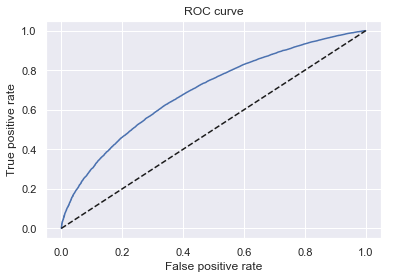

In [97]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [98]:
AUROC_1 = roc_auc_score(df_actual_predicted_probs_1['loan_data_targets_test'], df_actual_predicted_probs_1['y_hat_test_proba'])
AUROC_1

0.6941707709379977

### Gini and Kolmogorov-Smirnov

In [99]:
df_actual_predicted_probs_1 = df_actual_predicted_probs_1.sort_values('y_hat_test_proba')

In [100]:
df_actual_predicted_probs_1.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42313,0,0.369992,0
30095,0,0.411571,0
28823,0,0.436569,0
100528,1,0.449505,0
175979,1,0.453599,0


In [101]:
df_actual_predicted_probs_1.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
238543,1,0.992157,1
256968,1,0.992173,1
245093,1,0.992179,1
244178,1,0.992463,1
311856,1,0.992863,1


In [102]:
df_actual_predicted_probs_1 = df_actual_predicted_probs_1.reset_index()

In [103]:
df_actual_predicted_probs_1.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42313,0,0.369992,0
1,30095,0,0.411571,0
2,28823,0,0.436569,0
3,100528,1,0.449505,0
4,175979,1,0.453599,0


In [104]:
df_actual_predicted_probs_1['Cumulative N Population'] = df_actual_predicted_probs_1.index + 1
df_actual_predicted_probs_1['Cumulative N Good'] = df_actual_predicted_probs_1['loan_data_targets_test'].cumsum()
df_actual_predicted_probs_1['Cumulative N Bad'] = df_actual_predicted_probs_1['Cumulative N Population'] - df_actual_predicted_probs_1['loan_data_targets_test'].cumsum()

In [105]:
df_actual_predicted_probs_1.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42313,0,0.369992,0,1,0,1
1,30095,0,0.411571,0,2,0,2
2,28823,0,0.436569,0,3,0,3
3,100528,1,0.449505,0,4,1,3
4,175979,1,0.453599,0,5,2,3


In [106]:
df_actual_predicted_probs_1['Cumulative Perc Population'] = df_actual_predicted_probs_1['Cumulative N Population'] / (df_actual_predicted_probs_1.shape[0])
df_actual_predicted_probs_1['Cumulative Perc Good'] = df_actual_predicted_probs_1['Cumulative N Good'] / df_actual_predicted_probs_1['loan_data_targets_test'].sum()
df_actual_predicted_probs_1['Cumulative Perc Bad'] = df_actual_predicted_probs_1['Cumulative N Bad'] / (df_actual_predicted_probs_1.shape[0] - df_actual_predicted_probs_1['loan_data_targets_test'].sum())

### Evaluation of Credit Models

For new credit models the first question asked is "What is the Gini?"

The Gini is a metric that measure the effectiveness of the model disriminating between "good" obligors who will pay back their loans in the future and "bad" obligors who will not.  The metric is often used to compare the quality of different models and their prediction power.







Let's Calculate and plot the Gini co-efficient 

Text(0.5,1,'Gini')

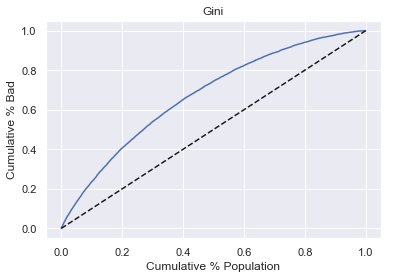

In [107]:
plt.plot(df_actual_predicted_probs_1['Cumulative Perc Population'], df_actual_predicted_probs_1['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs_1['Cumulative Perc Population'], df_actual_predicted_probs_1['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [108]:
Gini = AUROC * 2 - 1
Gini

0.405891125788189

Plot the KS Kolmogorov-Smirnov results

Text(0.5,1,'Kolmogorov-Smirnov')

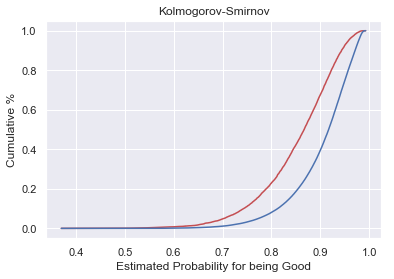

In [109]:
# Plot KS
plt.plot(df_actual_predicted_probs_1['y_hat_test_proba'], df_actual_predicted_probs_1['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs_1['y_hat_test_proba'], df_actual_predicted_probs_1['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

We calculate KS from the data. It is the maximum of the difeerence between the cummulative percentage of 'bad' and the cummulative percentage of good predictions 

In [110]:
KS_test_1 = max(df_actual_predicted_probs_1['Cumulative Perc Bad'] - df_actual_predicted_probs_1['Cumulative Perc Good'])
KS_test_1

0.2830431824137245

## Applying the PD Model
### Calculating PD of individual accounts


In [111]:
pd.options.display.max_columns = None

In [112]:
inputs_test_with_ref_cat_1.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_AL_FL_HI,addr_state:MD_OK_MO_NC_LA_NM,addr_state:NY,addr_state:VA_TN_AZ_RI_NJ_UT,addr_state:CA,addr_state:PA_AR_MI_IN_KY,addr_state:MN_MA_DE_OH_SD,addr_state:CR_WA_GA_VM,addr_state:SC_IL_CT,addr_state:TX,addr_state:CO_AK_MT_KS_VT,addr_state:ID_NH_MS_WY_DC_WV_ME,purpose:debt_consolidation,purpose:credit_card,purpose:educ__sm_b__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,initial_list_status:f,verification_status:Verified,verification_status:Source Verified,verification_status:Not Verified,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<=9.5,int_rate:9.5-12.0,int_rate:12.0-15.75,int_rate:15.75-20.25,int_rate:>20.25,funded_amnt:<5675,funded_amnt:5675-7400,funded_amnt:7400-10850,funded_amnt:10850-16025,funded_amnt:>16025,mths_since_earliest_cr_line:<145,mths_since_earliest_cr_line:145-182,mths_since_earliest_cr_line:182-255,mths_since_earliest_cr_line:255-292,mths_since_earliest_cr_line:292-382,mths_since_earliest_cr_line:>382,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3,inq_last_6mths:>4,total_acc:<=5,total_acc:5-10,total_acc:10-15,total_acc:16-20,total_acc:20-31,total_acc:32-47,total_acc:>47,payment_to_inc_factor:<1,payment_to_inc_factor:1-2,payment_to_inc_factor:2-4,payment_to_inc_factor:4-6,payment_to_inc_factor:6-8,payment_to_inc_factor:8-11,payment_to_inc_factor:11-15,payment_to_inc_factor:>15,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-21.0,dti:21.0-23.8,dti:23.8-35.0,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,retail_sales:<0.955,retail_sales:0.955-0.99,retail_sales:0.99-1.007,retail_sales:1.007-1.024,retail_sales:>1.024
362514,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
288564,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
213591,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
263083,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
165001,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


## Creating a Scorecard

Credit scorecards are mathematical models which attempt to provide a quantitative estimate of the probability that a customer will display a defined behavior (e.g. loan default, bankruptcy or a lower level of delinquency) with respect to their current or proposed credit position with a lender. Scorecards are built and optimized to evaluate the credit file of a homogeneous population (e.g. files with delinquencies, files that are very young, files that have very little information). Most empirically derived credit scoring systems have between 10 and 20 variables.[1] Application scores tend to be dominated by credit bureau data which typically amounts to over 80% of the predictive power from closer to 60% in the late 1980s[2] for UK scorecards. Indeed there has been an increasing trend to minimize applicant or non-verifiable variables from scorecards which has increased the contribution of the credit bureau data.


Credit scoring typically uses observations or data from clients who defaulted on their loans plus observations on a large number of clients who have not defaulted. Statistically, estimation techniques such as logistic regression or probit are used to create estimates of the probability of default for observations based on this historical data. This model can be used to predict probability of default for new clients using the same observation characteristics (e.g. age, income, house owner). The default probabilities are then scaled to a "credit score." This score ranks clients by riskiness without explicitly identifying their probability of default.

https://en.wikipedia.org/wiki/Credit_scorecards

    
    All Customers are seperated by profitability (H M L)
    Loyalty Score (H L)
    Scores Applied: based on the above. Profitable high risk customers may be accepted.

A Scorecard is a neutral, objective way to assess credit applications.
There is a baseline point score = 350 in our case, and points are added on for the other categories.
A scorecard can have any number of input variables, but an effective scorecard typically has 10-20 variables.
#Working with points rather than probabilities => easier end user interpretation, and helps customers target score improvement and identify discrepancies. IF, THEN, ELSE rules allow simple deployment.

#### Additional Real World Considerations:
Banks may further segment customers based their profitability and loyalty sore:

    All Customers are seperated by profitability (H M L)
    Loyalty Score (H L)
    Scores Applied: based on the above. Profitable high risk customers may be accepted.

Loyal may reduce the cuffoff score to a customer

### Build a Summary Table of Coefficients and p-values

In [113]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.489169,NaN
1,grade:A,1.037297,5.576174e-29
2,grade:B,0.881202,2.565777e-47
3,grade:C,0.665112,2.209950e-32
4,grade:D,0.494467,8.270945e-21
5,grade:E,0.339020,2.594554e-13
6,grade:F,0.172266,3.507995e-04
7,home_ownership:OWN,0.099114,8.099375e-07
8,home_ownership:MORTGAGE,0.114555,2.025964e-19
9,addr_state:MD_OK_MO_NC_LA_NM,0.072128,2.104043e-03


In [114]:
ref_categories_1

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_AL_FL_HI',
 'purpose:educ__sm_b__ren_en__mov__house',
 'verification_status:Verified',
 'initial_list_status:w',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.25',
 'funded_amnt:>16025',
 'mths_since_earliest_cr_line:<145',
 'inq_last_6mths:>4',
 'total_acc:5-10',
 'annual_inc:<20K',
 'payment_to_inc_factor:>15',
 'dti:>35',
 'mths_since_last_record:0-2',
 'retail_sales:0.955-0.99']

### Create a reference category dataframe

The reference categories are the dummies with the lowest ranking in each category. 
In the scorecard they form the baseline score for each feature.  Additional points are added 

First stage is building a Reference Category Dataframe containing Feature name, Coeffients and p-values for the baseline reference categories:

Higher coefficents = better borrower

In [115]:
df_ref_categories = pd.DataFrame(ref_categories_1, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan

df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_AL_FL_HI,0,NaN
3,purpose:educ__sm_b__ren_en__mov__house,0,NaN
4,verification_status:Verified,0,NaN
5,initial_list_status:w,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.25,0,NaN


### Combining these two tables into a df_scorecard table

In [116]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.489169,NaN
1,1,grade:A,1.037297,5.576174e-29
2,2,grade:B,0.881202,2.565777e-47
3,3,grade:C,0.665112,2.209950e-32
4,4,grade:D,0.494467,8.270945e-21
5,5,grade:E,0.339020,2.594554e-13
6,6,grade:F,0.172266,3.507995e-04
7,7,home_ownership:OWN,0.099114,8.099375e-07
8,8,home_ownership:MORTGAGE,0.114555,2.025964e-19
9,9,addr_state:MD_OK_MO_NC_LA_NM,0.072128,2.104043e-03


### Adding an Original Grouping Gategory

In [117]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.489169,NaN,Intercept
1,1,grade:A,1.037297,5.576174e-29,grade
2,2,grade:B,0.881202,2.565777e-47,grade
3,3,grade:C,0.665112,2.209950e-32,grade
4,4,grade:D,0.494467,8.270945e-21,grade
5,5,grade:E,0.339020,2.594554e-13,grade
6,6,grade:F,0.172266,3.507995e-04,grade
7,7,home_ownership:OWN,0.099114,8.099375e-07,home_ownership
8,8,home_ownership:MORTGAGE,0.114555,2.025964e-19,home_ownership
9,9,addr_state:MD_OK_MO_NC_LA_NM,0.072128,2.104043e-03,addr_state


### FICO scores range between 300 and 850
300 is the lowest score possible minimum credit assessment => borrower falls into 'worst' categories for all variables
850 is the maximum score possible => borrower falls into 'best' categories for all variables

In [118]:
min_score = 300
max_score = 850

### Min Score

In [119]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -1.489169
addr_state                     0.000000
annual_inc                     0.000000
dti                            0.000000
emp_length                     0.000000
funded_amnt                    0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status           -0.036245
inq_last_6mths                -0.060528
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d             0.000000
mths_since_last_record         0.000000
payment_to_inc_factor          0.000000
purpose                        0.000000
retail_sales                   0.000000
term                           0.000000
total_acc                     -0.116513
verification_status           -0.048194
Name: Coefficients, dtype: float64

In [120]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.7506492590721372

### Max Score

In [121]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                     -1.489169
addr_state                     0.481540
annual_inc                     0.571971
dti                            0.358579
emp_length                     0.139461
funded_amnt                    0.112325
grade                          1.037297
home_ownership                 0.114555
initial_list_status            0.000000
inq_last_6mths                 0.269512
int_rate                       0.932943
mths_since_earliest_cr_line    0.209076
mths_since_issue_d             0.980577
mths_since_last_record         0.489341
payment_to_inc_factor          0.627725
purpose                        0.491502
retail_sales                   0.301517
term                           0.079473
total_acc                      0.069809
verification_status            0.014463
Name: Coefficients, dtype: float64

In [122]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.7924971897355375

In [123]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.489169,NaN,Intercept,-108.581080
1,1,grade:A,1.037297,5.576174e-29,grade,75.633362
2,2,grade:B,0.881202,2.565777e-47,grade,64.251866
3,3,grade:C,0.665112,2.209950e-32,grade,48.495894
4,4,grade:D,0.494467,8.270945e-21,grade,36.053466
5,5,grade:E,0.339020,2.594554e-13,grade,24.719227
6,6,grade:F,0.172266,3.507995e-04,grade,12.560568
7,7,home_ownership:OWN,0.099114,8.099375e-07,home_ownership,7.226789
8,8,home_ownership:MORTGAGE,0.114555,2.025964e-19,home_ownership,8.352648
9,9,addr_state:MD_OK_MO_NC_LA_NM,0.072128,2.104043e-03,addr_state,5.259124


In [124]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

C:\Users\User1\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.489169,NaN,Intercept,319.065532,319.0
1,1,grade:A,1.037297,5.576174e-29,grade,75.633362,76.0
2,2,grade:B,0.881202,2.565777e-47,grade,64.251866,64.0
3,3,grade:C,0.665112,2.209950e-32,grade,48.495894,48.0
4,4,grade:D,0.494467,8.270945e-21,grade,36.053466,36.0
5,5,grade:E,0.339020,2.594554e-13,grade,24.719227,25.0
6,6,grade:F,0.172266,3.507995e-04,grade,12.560568,13.0
7,7,home_ownership:OWN,0.099114,8.099375e-07,home_ownership,7.226789,7.0
8,8,home_ownership:MORTGAGE,0.114555,2.025964e-19,home_ownership,8.352648,8.0
9,9,addr_state:MD_OK_MO_NC_LA_NM,0.072128,2.104043e-03,addr_state,5.259124,5.0


In [125]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
print("minimum score is: " + str(min_sum_score_prel))
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
print("maximum score is: " + str(max_sum_score_prel))
if min_sum_score_prel != min_score:
    if min_sum_score_prel < min_score:
        print("min score too low: increase intercept by: " + str(min_score-min_sum_score_prel))
    else:
        print("min score too high: decrease intercept by: " + str(min_score-min_sum_score_prel))
else:
    print("calibration good")
        
if max_sum_score_prel > max_score:
    print("adjust max score by: " + str(max_score-max_sum_score_prel))

minimum score is: 300.0
maximum score is: 850.0
calibration good


### Scorecard Calibration

In [126]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-1.489169,NaN,Intercept,319.065532,319.0,-0.065532
1,1,grade:A,1.037297,5.576174e-29,grade,75.633362,76.0,0.366638
2,2,grade:B,0.881202,2.565777e-47,grade,64.251866,64.0,-0.251866
3,3,grade:C,0.665112,2.209950e-32,grade,48.495894,48.0,-0.495894
4,4,grade:D,0.494467,8.270945e-21,grade,36.053466,36.0,-0.053466
5,5,grade:E,0.339020,2.594554e-13,grade,24.719227,25.0,0.280773
6,6,grade:F,0.172266,3.507995e-04,grade,12.560568,13.0,0.439432
7,7,home_ownership:OWN,0.099114,8.099375e-07,home_ownership,7.226789,7.0,-0.226789
8,8,home_ownership:MORTGAGE,0.114555,2.025964e-19,home_ownership,8.352648,8.0,-0.352648
9,9,addr_state:MD_OK_MO_NC_LA_NM,0.072128,2.104043e-03,addr_state,5.259124,5.0,-0.259124


In [127]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][0] = 319
df_scorecard['Score - Final'][1] = 75
df_scorecard

C:\Users\User1\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User1\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.489169,NaN,Intercept,319.065532,319.0,-0.065532,319.0
1,1,grade:A,1.037297,5.576174e-29,grade,75.633362,76.0,0.366638,75.0
2,2,grade:B,0.881202,2.565777e-47,grade,64.251866,64.0,-0.251866,64.0
3,3,grade:C,0.665112,2.209950e-32,grade,48.495894,48.0,-0.495894,48.0
4,4,grade:D,0.494467,8.270945e-21,grade,36.053466,36.0,-0.053466,36.0
5,5,grade:E,0.339020,2.594554e-13,grade,24.719227,25.0,0.280773,25.0
6,6,grade:F,0.172266,3.507995e-04,grade,12.560568,13.0,0.439432,13.0
7,7,home_ownership:OWN,0.099114,8.099375e-07,home_ownership,7.226789,7.0,-0.226789,7.0
8,8,home_ownership:MORTGAGE,0.114555,2.025964e-19,home_ownership,8.352648,8.0,-0.352648,8.0
9,9,addr_state:MD_OK_MO_NC_LA_NM,0.072128,2.104043e-03,addr_state,5.259124,5.0,-0.259124,5.0


In [128]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
print("minimum score is: " + str(min_sum_score_prel))
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
print("maximum score is: " + str(max_sum_score_prel))

minimum score is: 300.0
maximum score is: 849.0


### Calculating Credit Score

In [129]:
inputs_test_with_ref_cat_1.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_AL_FL_HI,addr_state:MD_OK_MO_NC_LA_NM,addr_state:NY,addr_state:VA_TN_AZ_RI_NJ_UT,addr_state:CA,addr_state:PA_AR_MI_IN_KY,addr_state:MN_MA_DE_OH_SD,addr_state:CR_WA_GA_VM,addr_state:SC_IL_CT,addr_state:TX,addr_state:CO_AK_MT_KS_VT,addr_state:ID_NH_MS_WY_DC_WV_ME,purpose:debt_consolidation,purpose:credit_card,purpose:educ__sm_b__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,initial_list_status:f,verification_status:Verified,verification_status:Source Verified,verification_status:Not Verified,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<=9.5,int_rate:9.5-12.0,int_rate:12.0-15.75,int_rate:15.75-20.25,int_rate:>20.25,funded_amnt:<5675,funded_amnt:5675-7400,funded_amnt:7400-10850,funded_amnt:10850-16025,funded_amnt:>16025,mths_since_earliest_cr_line:<145,mths_since_earliest_cr_line:145-182,mths_since_earliest_cr_line:182-255,mths_since_earliest_cr_line:255-292,mths_since_earliest_cr_line:292-382,mths_since_earliest_cr_line:>382,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3,inq_last_6mths:>4,total_acc:<=5,total_acc:5-10,total_acc:10-15,total_acc:16-20,total_acc:20-31,total_acc:32-47,total_acc:>47,payment_to_inc_factor:<1,payment_to_inc_factor:1-2,payment_to_inc_factor:2-4,payment_to_inc_factor:4-6,payment_to_inc_factor:6-8,payment_to_inc_factor:8-11,payment_to_inc_factor:11-15,payment_to_inc_factor:>15,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-21.0,dti:21.0-23.8,dti:23.8-35.0,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,retail_sales:<0.955,retail_sales:0.955-0.99,retail_sales:0.99-1.007,retail_sales:1.007-1.024,retail_sales:>1.024
362514,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
288564,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
213591,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
263083,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
165001,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [130]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.489169,NaN,Intercept,319.065532,319.0,-0.065532,319.0
1,1,grade:A,1.037297,5.576174e-29,grade,75.633362,76.0,0.366638,75.0
2,2,grade:B,0.881202,2.565777e-47,grade,64.251866,64.0,-0.251866,64.0
3,3,grade:C,0.665112,2.209950e-32,grade,48.495894,48.0,-0.495894,48.0
4,4,grade:D,0.494467,8.270945e-21,grade,36.053466,36.0,-0.053466,36.0
5,5,grade:E,0.339020,2.594554e-13,grade,24.719227,25.0,0.280773,25.0
6,6,grade:F,0.172266,3.507995e-04,grade,12.560568,13.0,0.439432,13.0
7,7,home_ownership:OWN,0.099114,8.099375e-07,home_ownership,7.226789,7.0,-0.226789,7.0
8,8,home_ownership:MORTGAGE,0.114555,2.025964e-19,home_ownership,8.352648,8.0,-0.352648,8.0
9,9,addr_state:MD_OK_MO_NC_LA_NM,0.072128,2.104043e-03,addr_state,5.259124,5.0,-0.259124,5.0


In [131]:
inputs_test_with_ref_cat_w_intercept_1 = inputs_test_with_ref_cat_1

In [132]:
inputs_test_with_ref_cat_w_intercept_1.insert(0, 'Intercept', 1)

In [133]:
inputs_test_with_ref_cat_w_intercept_1.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_AL_FL_HI,addr_state:MD_OK_MO_NC_LA_NM,addr_state:NY,addr_state:VA_TN_AZ_RI_NJ_UT,addr_state:CA,addr_state:PA_AR_MI_IN_KY,addr_state:MN_MA_DE_OH_SD,addr_state:CR_WA_GA_VM,addr_state:SC_IL_CT,addr_state:TX,addr_state:CO_AK_MT_KS_VT,addr_state:ID_NH_MS_WY_DC_WV_ME,purpose:debt_consolidation,purpose:credit_card,purpose:educ__sm_b__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,initial_list_status:f,verification_status:Verified,verification_status:Source Verified,verification_status:Not Verified,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<=9.5,int_rate:9.5-12.0,int_rate:12.0-15.75,int_rate:15.75-20.25,int_rate:>20.25,funded_amnt:<5675,funded_amnt:5675-7400,funded_amnt:7400-10850,funded_amnt:10850-16025,funded_amnt:>16025,mths_since_earliest_cr_line:<145,mths_since_earliest_cr_line:145-182,mths_since_earliest_cr_line:182-255,mths_since_earliest_cr_line:255-292,mths_since_earliest_cr_line:292-382,mths_since_earliest_cr_line:>382,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3,inq_last_6mths:>4,total_acc:<=5,total_acc:5-10,total_acc:10-15,total_acc:16-20,total_acc:20-31,total_acc:32-47,total_acc:>47,payment_to_inc_factor:<1,payment_to_inc_factor:1-2,payment_to_inc_factor:2-4,payment_to_inc_factor:4-6,payment_to_inc_factor:6-8,payment_to_inc_factor:8-11,payment_to_inc_factor:11-15,payment_to_inc_factor:>15,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-21.0,dti:21.0-23.8,dti:23.8-35.0,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,retail_sales:<0.955,retail_sales:0.955-0.99,retail_sales:0.99-1.007,retail_sales:1.007-1.024,retail_sales:>1.024
362514,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
288564,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
213591,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
263083,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
165001,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


Keeping just the columns we need

In [134]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept_1[df_scorecard['Feature name'].values]

In [135]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:MD_OK_MO_NC_LA_NM,addr_state:NY,addr_state:VA_TN_AZ_RI_NJ_UT,addr_state:CA,addr_state:PA_AR_MI_IN_KY,addr_state:MN_MA_DE_OH_SD,addr_state:CR_WA_GA_VM,addr_state:SC_IL_CT,addr_state:TX,addr_state:CO_AK_MT_KS_VT,addr_state:ID_NH_MS_WY_DC_WV_ME,purpose:debt_consolidation,purpose:credit_card,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,verification_status:Source Verified,verification_status:Not Verified,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<=9.5,int_rate:9.5-12.0,int_rate:12.0-15.75,int_rate:15.75-20.25,funded_amnt:<5675,funded_amnt:5675-7400,funded_amnt:7400-10850,funded_amnt:10850-16025,mths_since_earliest_cr_line:145-182,mths_since_earliest_cr_line:182-255,mths_since_earliest_cr_line:255-292,mths_since_earliest_cr_line:292-382,mths_since_earliest_cr_line:>382,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3,payment_to_inc_factor:<1,payment_to_inc_factor:1-2,payment_to_inc_factor:2-4,payment_to_inc_factor:4-6,payment_to_inc_factor:6-8,payment_to_inc_factor:8-11,payment_to_inc_factor:11-15,total_acc:<=5,total_acc:10-15,total_acc:16-20,total_acc:20-31,total_acc:32-47,total_acc:>47,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-21.0,dti:21.0-23.8,dti:23.8-35.0,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,retail_sales:<0.955,retail_sales:0.99-1.007,retail_sales:1.007-1.024,retail_sales:>1.024,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_AL_FL_HI,purpose:educ__sm_b__ren_en__mov__house,verification_status:Verified,initial_list_status:w,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.25,funded_amnt:>16025,mths_since_earliest_cr_line:<145,inq_last_6mths:>4,total_acc:5-10,annual_inc:<20K,payment_to_inc_factor:>15,dti:>35,mths_since_last_record:0-2,retail_sales:0.955-0.99
362514,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
288564,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
213591,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
263083,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
165001,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [136]:
scorecard_scores = df_scorecard['Score - Final']

In [137]:
print(inputs_test_with_ref_cat_w_intercept.shape)
print(scorecard_scores.shape)

(93257, 117)
(117,)


In [138]:
scorecard_scores = scorecard_scores.values.reshape(117, 1)

In [139]:
scorecard_scores.shape

(117, 1)

In [140]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores.head()
y_scores.tail()

,0
115,569.0
296284,674.0
61777,569.0
91763,584.0
167512,651.0


### From Credit Score to PD

Credit scores are used to measure an individual's probability of default at the start of a loan.
Now that we have credit scores for the test set we can map them back to probability of default.


In [141]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [142]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
362514,0.918239
288564,0.885781
213591,0.902617
263083,0.981196
165001,0.941323


In [143]:
y_hat_test_proba[0: 5]

array([0.92674288, 0.90464222, 0.90932092, 0.98093934, 0.94577906])

In [144]:
y_hat_test_proba_df = pd.DataFrame(y_hat_test_proba)
print(y_hat_test_proba_df.shape)
print(y_hat_proba_from_score.shape)
y_hat_test_proba_df.head()

(93257, 1)
(93257, 1)


,0
0,0.926743
1,0.904642
2,0.909321
3,0.980939
4,0.945779


In [145]:
y_hat_proba_from_score['score_pd'] = y_hat_test_proba
y_hat_proba_from_score['pd_diff'] = y_hat_proba_from_score['score_pd'] - y_hat_proba_from_score[0]

In [146]:
y_hat_proba_from_score.head()

,0,score_pd,pd_diff
362514,0.918239,0.926743,0.008504
288564,0.885781,0.904642,0.018861
213591,0.902617,0.909321,0.006704
263083,0.981196,0.980939,-0.000257
165001,0.941323,0.945779,0.004456


In [147]:
y_hat_proba_from_score.describe()

,0,score_pd,pd_diff
count,93257.000000,93257.000000,93257.000000
mean,0.888550,0.896641,0.008091
std,0.073785,0.068713,0.018335
min,0.412961,0.369992,-0.108649
25%,0.849785,0.861347,0.001504
50%,0.905002,0.912500,0.005682
75%,0.944281,0.947794,0.014143
max,0.992616,0.992863,0.178235


### Setting Cut-Offs

The cut off rate is used for taking a decision whether to approve a loan application or not.
To set cutoffs for lending decisions we use the confusion matrix again.

    1) It pre determines the total number of borrowers that will be approved and rejected
    2) It impacts the quality of the loans

Is a trade off between quality and volume.

In [148]:
df_actual_predicted_probs_1.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42313,0,0.369992,0,1,0,1,0.000011,0.000000,0.000099
1,30095,0,0.411571,0,2,0,2,0.000021,0.000000,0.000198
2,28823,0,0.436569,0,3,0,3,0.000032,0.000000,0.000297
3,100528,1,0.449505,0,4,1,3,0.000043,0.000012,0.000297
4,175979,1,0.453599,0,5,2,3,0.000054,0.000024,0.000297


In [149]:
tr = 0.9
df_actual_predicted_probs_1['y_hat_test'] = np.where(df_actual_predicted_probs_1['y_hat_test_proba'] > tr, 1, 0)

In [150]:
pd.crosstab(df_actual_predicted_probs_1['loan_data_targets_test'], df_actual_predicted_probs_1['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.018277,0.008769
1,0.088015,0.134939


In [151]:
roc_curve(df_actual_predicted_probs_1['loan_data_targets_test'], df_actual_predicted_probs_1['y_hat_test'])

(array([0.        , 0.32421449, 1.        ]),
 array([0.        , 0.60523278, 1.        ]),
 array([2, 1, 0]))

In [152]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs_1['loan_data_targets_test'], df_actual_predicted_probs_1['y_hat_test_proba'])

Text(0.5,1,'ROC curve')

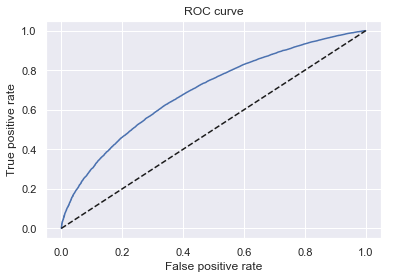

In [153]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

### Thresholds

In [154]:
thresholds

array([1.99286344, 0.99286344, 0.99019266, ..., 0.45808976, 0.4495052 ,
       0.36999246])

In [155]:
thresholds.shape

(17207,)

In [156]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

In [157]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [158]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.992863,0.000000,0.000000
1,0.992863,0.000000,0.000012
2,0.990193,0.000000,0.000697
3,0.990191,0.000099,0.000697
4,0.989756,0.000099,0.000926


Setting the first threshold to almost zero

In [159]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

The the difference between the ln of the ratio of the threshold and 1 minus the threshold and
the minimum sum of coefficients multiplied by: the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and the difference between the maximum sum of coefficients and the minimum sum of coefficients.

In [160]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [161]:
df_cutoffs.head(5)

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,1984.0
1,0.992863,0.000000,0.000012,788.0
2,0.990193,0.000000,0.000697,764.0
3,0.990191,0.000099,0.000697,764.0
4,0.989756,0.000099,0.000926,761.0


In [162]:
df_cutoffs['Score'][0] = max_score

In [163]:
df_cutoffs.head(10)

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992863,0.000000,0.000012,788.0
2,0.990193,0.000000,0.000697,764.0
3,0.990191,0.000099,0.000697,764.0
4,0.989756,0.000099,0.000926,761.0
5,0.989742,0.000198,0.000926,761.0
6,0.989436,0.000198,0.001142,759.0
7,0.989436,0.000297,0.001142,759.0
8,0.989261,0.000297,0.001443,757.0
9,0.989233,0.000396,0.001443,757.0


In [164]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17202,0.469275,0.999604,0.999952,419.0
17203,0.460249,0.999604,0.999976,416.0
17204,0.458090,0.999703,0.999976,415.0
17205,0.449505,0.999703,1.000000,413.0
17206,0.369992,1.000000,1.000000,389.0


In [165]:
def n_approved(p):
    '''predicted probability of loan approval for a given threshold'''
    return np.where(df_actual_predicted_probs_1['y_hat_test_proba'] >= p, 1, 0).sum()

In [166]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs_1['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs_1['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [167]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992863,0.000000,0.000012,788.0,1,93256,0.000011,0.999989
2,0.990193,0.000000,0.000697,764.0,58,93199,0.000622,0.999378
3,0.990191,0.000099,0.000697,764.0,59,93198,0.000633,0.999367
4,0.989756,0.000099,0.000926,761.0,78,93179,0.000836,0.999164


In [168]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17202,0.469275,0.999604,0.999952,419.0,93249,8,0.999914,0.000086
17203,0.460249,0.999604,0.999976,416.0,93251,6,0.999936,0.000064
17204,0.458090,0.999703,0.999976,415.0,93252,5,0.999946,0.000054
17205,0.449505,0.999703,1.000000,413.0,93254,3,0.999968,0.000032
17206,0.369992,1.000000,1.000000,389.0,93257,0,1.000000,0.000000


Filtering on the cutoffs table by threshold

In [169]:
# around 90%
df_cutoffs.iloc[5270: 5370, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5270,0.908088,0.279017,0.557546,595.0,49185,44072,0.527413,0.472587
5271,0.908085,0.279215,0.557546,595.0,49187,44070,0.527435,0.472565
5272,0.908081,0.279215,0.557594,595.0,49191,44066,0.527478,0.472522
5273,0.908080,0.279314,0.557594,595.0,49192,44065,0.527489,0.472511
5274,0.908077,0.279314,0.557618,595.0,49194,44063,0.527510,0.472490
5275,0.908077,0.279413,0.557618,595.0,49195,44062,0.527521,0.472479
5276,0.908073,0.279413,0.557642,595.0,49197,44060,0.527542,0.472458
5277,0.908073,0.279512,0.557642,595.0,49198,44059,0.527553,0.472447
5278,0.908051,0.279512,0.557727,595.0,49205,44052,0.527628,0.472372
5279,0.908047,0.279611,0.557727,595.0,49206,44051,0.527639,0.472361


In [170]:
# around 95%
df_cutoffs.iloc[1000: 1100, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.957456,0.050847,0.197576,655.0,16945,76312,0.181702,0.818298
1001,0.957456,0.050947,0.197576,655.0,16946,76311,0.181713,0.818287
1002,0.957449,0.050947,0.197612,655.0,16949,76308,0.181745,0.818255
1003,0.957445,0.051046,0.197612,655.0,16950,76307,0.181756,0.818244
1004,0.957420,0.051046,0.197804,655.0,16966,76291,0.181927,0.818073
1005,0.957417,0.051145,0.197804,655.0,16967,76290,0.181938,0.818062
1006,0.957389,0.051145,0.198045,655.0,16987,76270,0.182153,0.817847
1007,0.957389,0.051343,0.198045,655.0,16989,76268,0.182174,0.817826
1008,0.957276,0.051343,0.198814,654.0,17053,76204,0.182860,0.817140
1009,0.957276,0.051442,0.198814,654.0,17054,76203,0.182871,0.817129


### Pickling the Scorecard and Cutoffs Output

In [171]:
inputs_train_with_ref_cat_1.to_pickle('../data/inputs_train_with_ref_cat.pkl')

In [172]:
df_scorecard.to_pickle('../data/df_scorecard.pkl')

In [173]:
df_scorecard.to_pickle('../data/df_cutoffs.pkl')

### Mapping Score to Approval & Rejection Rates

Below are some functions to return approval and rejection rates for a given score, and to return a score for a given approval rating, using the scorecard dataframe df_cutoffs.

In [174]:
import clockwork_orange as clockwork

In [175]:
clockwork.score_to_cutoff(670, df_cutoffs)

Approval rate is:  0.1295
Rejection rate is: 0.8705


In [176]:
clockwork.score_to_cutoff(720, df_cutoffs)

Approval rate is:  0.0241
Rejection rate is: 0.9759


In [177]:
clockwork.approval_to_cutoff(0.95, df_cutoffs)

Cutoff level 0.95 not in table.
0.95001 is the nearest cutoff:
Score is :  512.0


In [178]:
clockwork.approval_to_cutoff(0.14, df_cutoffs)

Cutoff level 0.14 not in table.
0.13982 is the nearest cutoff:
Score is :  667.0
